# Assignment 1: Supervised Learning [ __ / 100 marks]

<img src="https://miro.medium.com/max/700/1*uo6VfVH87jRjMZWVdwq3Vw.png"/>

In this assignment we will be comparing the fits of the $L_2$ (OLS) and $L_1$ (LAD) cost functions on the famous iris dataset. Take a look at L1_C.ipynb if you get stuck (you can find this on OWL --> Lessons --> Week 1: "Supervised Learning, Regression"). Note: for brevity, I will write $L_2$ as L2 and $L_1$ as L1.

#### Before you start...

Recall the L1 loss function:

$$L_1(\theta) = \sum_{i=1}^{n} \lvert {y_i-\hat{y_i}} \rvert$$

Also recall the L2 loss function:

$$L_2(\theta) = \sum_{i=1}^{n} ({y_i-\hat{y_i}})^2$$

#### Ok, let's start...

In [1]:
# imports
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import scipy.optimize as so
from IPython.display import display
%matplotlib inline

### Question 1.1 [ _ /4 marks]

Download the file `iris.csv` (from the A1 page) into the same folder as this notebook. Using pandas, read this csv file into a DataFrame. Next, plot a scatter plot using the "petal.width" column as your independent variable and "sepal.length" as your dependent variable. Label the axes. 

<bound method NDFrame.head of      sepal.length  sepal.width  petal.length  petal.width    variety
0             5.1          3.5           1.4          0.2     Setosa
1             4.9          3.0           1.4          0.2     Setosa
2             4.7          3.2           1.3          0.2     Setosa
3             4.6          3.1           1.5          0.2     Setosa
4             5.0          3.6           1.4          0.2     Setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  Virginica
146           6.3          2.5           5.0          1.9  Virginica
147           6.5          3.0           5.2          2.0  Virginica
148           6.2          3.4           5.4          2.3  Virginica
149           5.9          3.0           5.1          1.8  Virginica

[150 rows x 5 columns]>


Text(0, 0.5, 'Sepal Length')

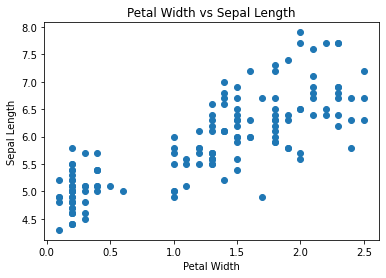

In [2]:
# read the csv in with pandas [ /1 mark]

df = pd.read_csv("iris.csv")
print(df.head)

# plot a scatter plot with labels [ /3 marks]

plt.scatter(df["petal.width"],df["sepal.length"])
plt.title("Petal Width vs Sepal Length")
plt.xlabel("Petal Width")
plt.ylabel("Sepal Length")

### Question 1.2 [ _/4 marks]

For a linear model we obtain predictions using $ \mathbf{\hat{y}} = \mathbf{X} \mathbf{b} $, where $\mathbf{X}$ has a column of ones and a column of inputs $x_i$, and $\mathbf{b}$ contains parameters $b_0$ and $b_1$. 

\begin{equation}
\begin{bmatrix}
\hat{y_0}\\
\hat{y_1}\\
.. \\
\hat{y_n}
\end{bmatrix}
= 
\begin{bmatrix}
1 & x_0\\
1 & x_1\\
.. & .. \\
1 & x_n
\end{bmatrix}
\begin{bmatrix}
b_0\\
b_1\\
\end{bmatrix}
\end{equation}

Write a function called `linearModelPredict` which returns predictions `yp` (a 1d-array) given arguments X (a 2d-array) and b (a 1d-array). Test this function with the values provided (i.e. print or display the result of the function call). 

In [3]:
# write your function here [ /2 marks]
def linearModelPredict(b,X):
    yp = np.dot(X,b)
    return yp

# use these provided values
X = np.array([[1,0],[1,-1],[1,2]])
b = np.array([0.1,0.3])

# test your function here [ /2 marks]
print(linearModelPredict(b,X))

[ 0.1 -0.2  0.7]


### Question 1.3 [ _/8 marks]

Write a function called `linearModelLossRSS` which returns a 2-tuple containing the L2 loss value (rss) and the gradient (provided) given arguments b (1d-array), X (2d-array), and y (observed output, a 1d-array). Test linearModelLossRSS with the values provided for X, b, and y by calling said function with these values and displaying or printing the resulting output. 

In [4]:
# write your function here [ /6 marks]
def linearModelLossRSS(b,X,y):
    yp = linearModelPredict(b,X)
    res = y - yp
    rss = sum(res**2)
    gradient= -2*np.dot(res,X)
    return (rss, gradient)

# use these provided values 
X = np.array([[1,0],[1,-1],[1,2]])
b = np.array([0.1,0.3])
y = np.array([0,0.4,2]) 

# test your function here [ /2 marks]
print("RSS: ",linearModelLossRSS(b,X,y)[0])
print("Gradient: ",linearModelLossRSS(b,X,y)[1])


RSS:  2.06
Gradient:  [-3.6 -4. ]


### Question 1.4 [ _/8 marks]

Write a function called `linearModelLossLAD`: it returns a 2-tuple containing the L1 loss value (sad) and the gradient (provided) given arguments b (1d-array), X (2d-array), and y (observed output, a 1d-array). Test linearModelLossLAD with the values provided for X, b, and y by calling the function with these values and displaying or printing the resulting output.

In [5]:
# write your function here [ /6 marks]
def linearModelLossLAD(b,X,y):
    yp = linearModelPredict(b,X)
    res = y-yp
    sad = sum(abs(res))
    grad = - (np.dot(np.sign(res),X))
    return (sad,grad)

# use these provided values
X = np.array([[1,0],[1,-1],[1,2]])
b = np.array([0.1,0.3])
y = np.array([0,0.4,2]) 

#test your function here [ /2 marks]
print("SAD: ",linearModelLossLAD(b,X,y)[0])
print("Gradient: ",linearModelLossLAD(b,X,y)[1])


SAD:  2.0
Gradient:  [-1. -1.]


### Question 1.5 [ _/14 marks]

Write a function called `linearModelFit` which returns a 2-tuple containing a prediction for b (`bpr`, a 1d-array) and the $R^2$ value (`R2`) of your fit, given arguments X (2d-array), y (1d-array), and lossf (the loss function for your fit). For now, set lossf as the L2 loss function that you defined previously. Call linearModelFit with the provided values and print the result.

In [6]:
# write your function here [ /12 marks]
def linearModelFit(X,y,lossf = linearModelLossRSS):
    nrows,ncols = X.shape
    bpr=np.zeros((ncols,1))
    RES = so.minimize(lossf, bpr, args=(X,y),jac=True)
    bpr= RES.x
    
    res = y - np.mean(y)
    TSS = sum(res**2)
    RSS,deriv = linearModelLossRSS(bpr, X,y)
    R2 = 1-(RSS/TSS)
    return (bpr,R2)

# use these provided values
X = np.array([[1,0],[1,-1],[1,2]])
b = np.array([0.1,0.3])
y = np.array([0,0.4,2]) 

# test your function here [ /2 marks]
b, R2 = linearModelFit(X,y,lossf = linearModelLossRSS)
print("B Prediction: ", b)
print("R2: ",R2)

                   

B Prediction:  [0.6 0.6]
R2:  0.75


### Question 2.1 [ _/13 marks]

Let's fit our L1 and L2 models to the iris data from Question 1.1 and then plot our prediction lines. We'll start with L2: Fit the data from 1.1 using `linearModelFit` (with `lossf = linearModelLossRSS`) to get an estimate for b (name it `bpr`). Use bpr to generate a prediction line for new data `X_new` (provided). In a single figure, plot the data points with the fit line; label the axes; finally, display or print the $R^2$ value (or alternatively, annotate the plot with the $R^2$ value).

R2 value: 0.6690276860464135


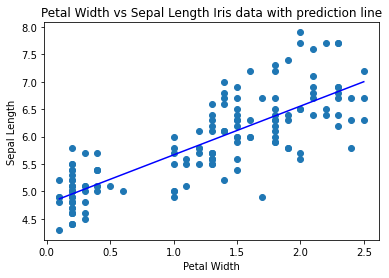

In [7]:
# put data from 1.1 into X,y [ /4 marks]
y = df.loc[:,"sepal.length"].values
x = df.loc[:,"petal.width"].values
X = np.transpose(np.concatenate([[np.ones(len(df))], [df["petal.width"].to_numpy()]]))
# fit this data with linearModelFit [ /2 marks]
bpr, R2 = linearModelFit(X,y,lossf = linearModelLossRSS)

# use this data for your prediction plot
x_grid = np.linspace(x.min(), x.max(),10)
Xnew = np.c_[np.ones(x_grid.size), x_grid]

# get your predicted y using Xnew [ /2 marks]
yp = linearModelPredict(bpr, Xnew)

# plot the iris data with your prediction line, print R2 [ /5 marks]

plt.scatter(df["petal.width"],df["sepal.length"])
plt.title("Petal Width vs Sepal Length Iris data with prediction line")
plt.xlabel("Petal Width")
plt.ylabel("Sepal Length")
plt.plot(Xnew[:,1],yp, color='blue', linestyle='-')

print("R2 value:", R2)

### Question 2.2 [ _/15 marks]

Now consider L1 as your loss function. Fit the data from 1.1 using `linearModelFit` with `lossf = linearModelLossLAD` to get an estimate for b (name it `bpr`). Use bpr to generate a prediction line for new data `X_new` (provided). In a single figure, plot the data points and fit line; also label the plot with axes; finally, print the $R^2$ value (or annotate the plot). Which of the two fit lines appears to best match the data? Write your answer below.

R2 value: 0.6638579340444306
It appears to be that L2 loss function fit line best match to the data. The R2 value for L2 is higher as well as based on observation it appears to disects through points more accurately.


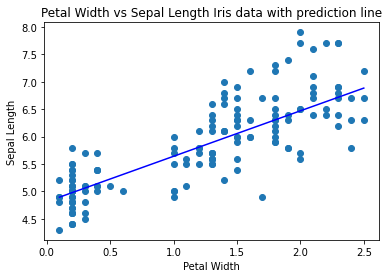

In [8]:
# put data from 1.1 into X,y [ /4 marks]
y = df.loc[:,"sepal.length"].values
x = df.loc[:,"petal.width"].values
X = np.transpose(np.concatenate([[np.ones(len(df))], [df["petal.width"].to_numpy()]]))

# fit the data with linearModelFit [ /2 marks]
bpr, R2 = linearModelFit(X,y,lossf = linearModelLossLAD)

# use this data for your prediction plot
x_grid = np.linspace(x.min(), x.max(),10)
Xnew = np.c_[np.ones(x_grid.size), x_grid]

# get your predicted y ('yp') using Xnew [ /2 marks]
yp = linearModelPredict(bpr, Xnew)

# plot the iris data with your prediction line, print R2 [ /5 marks]
plt.scatter(df["petal.width"],df["sepal.length"])
plt.title("Petal Width vs Sepal Length Iris data with prediction line")
plt.xlabel("Petal Width")
plt.ylabel("Sepal Length")
plt.plot(Xnew[:,1],yp, color='blue', linestyle='-')

print("R2 value:", R2)


# Q.   Which of the two fit lines appears to best match the data? [ /2 marks]
# ANS: It appears to be that L2 loss function fit line best match to the data. The R2 value for L2 is 
#      higher as well as based on observation it appears to disects through points more accurately.
print("It appears to be that L2 loss function fit line best match to the data. The R2 value for L2 is higher as well as based on observation it appears to disects through points more accurately.")

### Question 2.3 [ _/20 marks]

Download the file `outliers.csv` (from the A1 page) into the same folder as this notebook. Using pandas, read this file into a DataFrame, then append this to your iris dataset DataFrame. Perform an L1 fit and an L2 fit on this combined DataFrame (iris + outliers). Finally, plot lines of best fit using new x values (i.e. the code is provided for the L2 fit and you can reuse those lines of code for L1). Which of the two fit lines appears to best match the data? Write your answer below. 

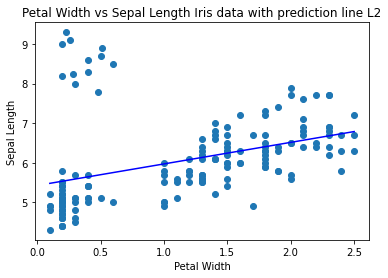

R2 value for L2: 0.15124448500184984


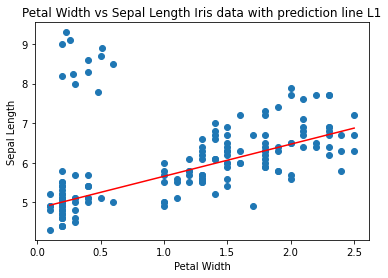

R2 value for L1: 0.048636124413092285
Based on the R2 values and the way the line behaviour it is difficult to determine which line fits better.
However, since we know this data contains few outliers, L1 seems to be the better fit.


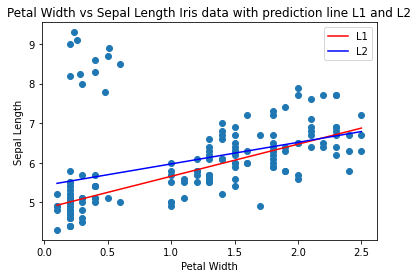

In [9]:
# read outliers.csv, append it to original dataframe [ /2 marks]
# ****** your code here ******
df1=pd.read_csv('outliers.csv')
df1=df.append(df1,ignore_index=True)
#print(df1)

# put data (iris + outliers) into variables X,y [ /5 marks]
y = df1.loc[:,"sepal.length"].values
x = df1.loc[:,"petal.width"].values
X = np.transpose(np.concatenate([[np.ones(len(df1))], [df1["petal.width"].to_numpy()]]))

# fit the data with linearModelFit [ /2 marks]
bpr, R2 = linearModelFit(X,y,lossf = linearModelLossRSS)

# use new x data for your prediction plot
x_grid = np.linspace(x.min(), x.max(),10)
Xnew = np.c_[np.ones(x_grid.size), x_grid]

# get your predicted y ('yp') using Xnew [ /2 marks]
ypl2 = linearModelPredict(bpr, Xnew)


# plot the iris data with your prediction line, print R2 [ /5 marks]
plt.scatter(df1["petal.width"],df1["sepal.length"])
plt.title("Petal Width vs Sepal Length Iris data with prediction line L2")
plt.xlabel("Petal Width")
plt.ylabel("Sepal Length")
plt.plot(Xnew[:,1],ypl2, color='blue', linestyle='-')
plt.show()
print("R2 value for L2:", R2)

# repeat the above process for L1 (i.e. repeat lines 10-17 for L1) [ /2 marks]
# ****** your code here ******


bprl1, R2l1 = linearModelFit(X,y,lossf = linearModelLossLAD)
x_grid = np.linspace(x.min(), x.max(),10)
Xnew = np.c_[np.ones(x_grid.size), x_grid]

# get your predicted y ('yp') using Xnew [ /2 marks]
ypl1 = linearModelPredict(bprl1, Xnew)

# plot the iris data with your prediction line, print R2 [ /5 marks]
plt.scatter(df1["petal.width"],df1["sepal.length"])
plt.title("Petal Width vs Sepal Length Iris data with prediction line L1")
plt.xlabel("Petal Width")
plt.ylabel("Sepal Length")
plt.plot(Xnew[:,1],ypl1, color='red', linestyle='-')
plt.show()
print("R2 value for L1:", R2l1)

# Which of the two fit lines appears to best match the data? [ /2 marks]
# Based on the R2 values and the way the line behaviour it is difficult to determine which line fits better.
# However, since we know this data contains few outliers, L1 seems to be the better fit.
print("Based on the R2 values and the way the line behaviour it is difficult to determine which line fits better.") 
print("However, since we know this data contains few outliers, L1 seems to be the better fit.")

plt.plot(Xnew[:,1],ypl1, color='red', linestyle='-')
plt.plot(Xnew[:,1],ypl2, color='blue', linestyle='-')
plt.scatter(df1["petal.width"],df1["sepal.length"])
plt.title("Petal Width vs Sepal Length Iris data with prediction line L1 and L2")
plt.xlabel("Petal Width")
plt.ylabel("Sepal Length")
plt.legend(["L1","L2"])
plt.show()


### Question 2.4: [ _/14 marks]

Ok, let's put everything together into a single plot. To start, plot the combined DataFrame (iris + outliers). Next, plot prediction lines for L1 and L2 fits on the combined data. Finally, plot prediction lines for L1 and L2 fits on the original (iris) data. Add a legend; also add axis labels. *Based on this plot, does L1 loss or L2 loss appear to be more robust to outliers?*

R2 for L2 with outliers:  0.15124448500184984
R2 for L1 with outliers:  0.048636124413092285


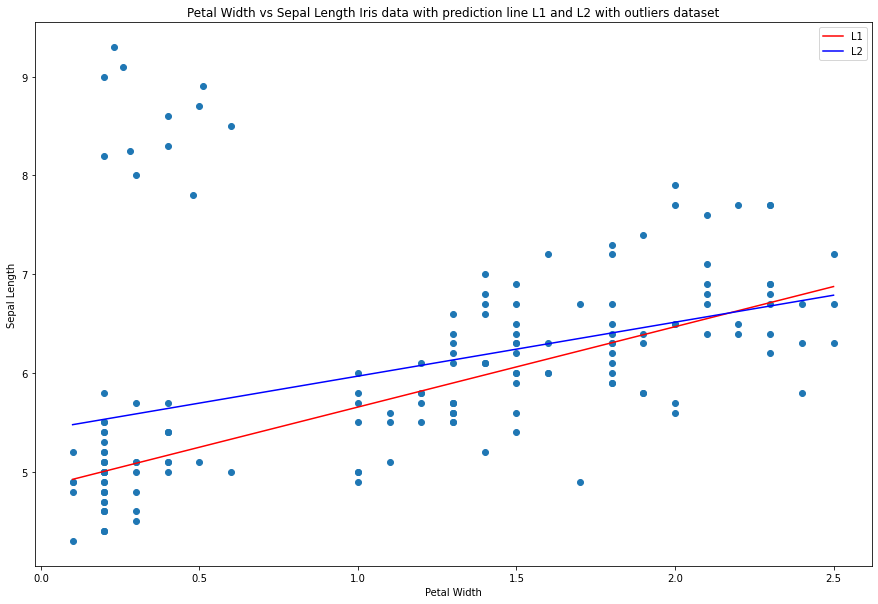

R2 for L2 original:  0.6690276860464135
R2 for L1 original:  0.6638579340444306


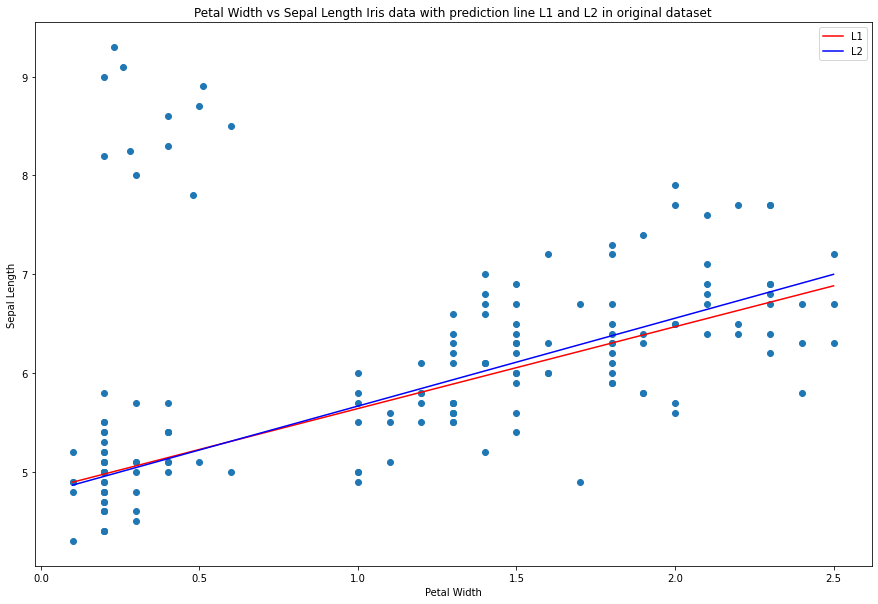

Based on the following plot, L1 seems to be more robust to outliers.


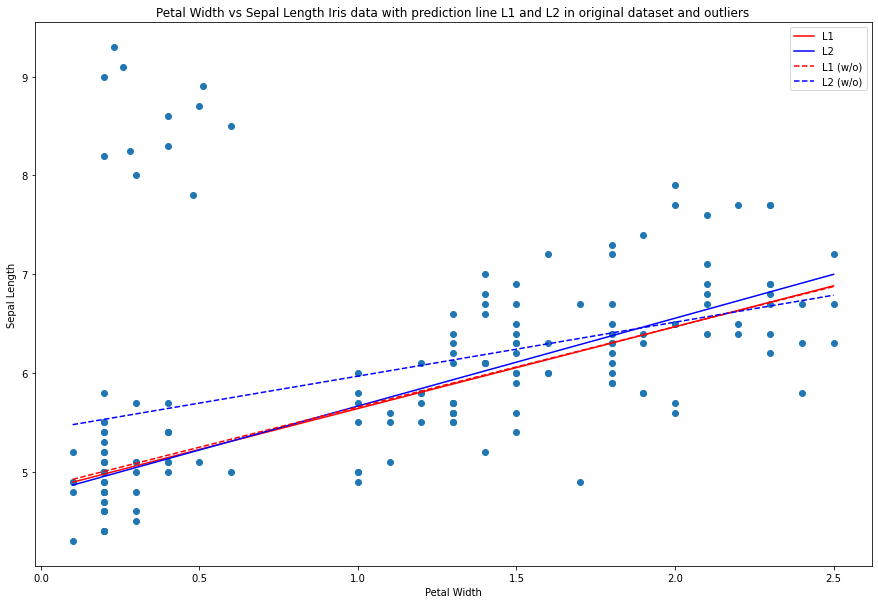

In [10]:
# this increases the figure size for added viewability
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10

# plot the data and fits (L1, L2) for the combined dataset [ /5 marks]
# ****** your code here ******
# put data (iris + outliers) into variables X,y 
#              L2 with outliers

y_o = df1.loc[:,"sepal.length"].values
x_o = df1.loc[:,"petal.width"].values
X_o = np.transpose(np.concatenate([[np.ones(len(df1))], [df1["petal.width"].to_numpy()]]))

# fit the data with linearModelFit 
bpr_o_l2, R2_o_l2 = linearModelFit(X,y,lossf = linearModelLossRSS)
print("R2 for L2 with outliers: ", R2_o_l2)
# use new x data for your prediction plot
x_grid = np.linspace(x_o.min(), x_o.max(),10)
Xnew = np.c_[np.ones(x_grid.size), x_grid]

# get your predicted y ('yp') using Xnew 
yp_o_l2 = linearModelPredict(bpr_o_l2, Xnew)
#              L1 with outliers

# fit the data with linearModelFit 
bpr_o_l1, R2_o_l1 = linearModelFit(X,y,lossf = linearModelLossLAD)
print("R2 for L1 with outliers: ", R2_o_l1)
# use new x data for your prediction plot
x_grid = np.linspace(x_o.min(), x_o.max(),10)
Xnew = np.c_[np.ones(x_grid.size), x_grid]

# get your predicted y ('yp') using Xnew 
yp_o_l1 = linearModelPredict(bpr_o_l1, Xnew)

plt.plot(Xnew[:,1],yp_o_l1, color='red', linestyle='-')
plt.plot(Xnew[:,1],yp_o_l2, color='blue', linestyle='-')
plt.scatter(df1["petal.width"],df1["sepal.length"])
plt.title("Petal Width vs Sepal Length Iris data with prediction line L1 and L2 with outliers dataset")
plt.xlabel("Petal Width")
plt.ylabel("Sepal Length")
plt.legend(["L1","L2"])
plt.show()

# plot fits (L1, L2) for the original iris dataset [ /5 marks], include legend/labels [ /2 marks]
# ****** your code here ******
#              L2 original data
y = df.loc[:,"sepal.length"].values
x = df.loc[:,"petal.width"].values
X = np.transpose(np.concatenate([[np.ones(len(df))], [df["petal.width"].to_numpy()]]))

# fit the data with linearModelFit 
bpr_l2, R2_l2 = linearModelFit(X,y,lossf = linearModelLossRSS)
print("R2 for L2 original: ", R2_l2)
# use new x data for your prediction plot
x_grid = np.linspace(x.min(), x.max(),10)
Xnew = np.c_[np.ones(x_grid.size), x_grid]

# get your predicted y ('yp') using Xnew 
yp_l2 = linearModelPredict(bpr_l2, Xnew)

#              L1 original data

# fit the data with linearModelFit 
bpr_l1, R2_l1 = linearModelFit(X,y,lossf = linearModelLossLAD)
print("R2 for L1 original: ", R2_l1)

# use new x data for your prediction plot
x_grid = np.linspace(x.min(), x.max(),10)
Xnew = np.c_[np.ones(x_grid.size), x_grid]

# get your predicted y ('yp') using Xnew 
yp_l1 = linearModelPredict(bpr_l1, Xnew)

plt.plot(Xnew[:,1],yp_l1, color='red', linestyle='-')
plt.plot(Xnew[:,1],yp_l2, color='blue', linestyle='-')
plt.scatter(df1["petal.width"],df1["sepal.length"])
plt.title("Petal Width vs Sepal Length Iris data with prediction line L1 and L2 in original dataset")
plt.xlabel("Petal Width")
plt.ylabel("Sepal Length")
plt.legend(["L1","L2"])
plt.show()

#      Based on this plot, does L1 loss or L2 loss appear to be more robust to outliers? [ /2 marks]
# Ans: Based on the following plot, L1 seems to be more robust to outliers.
print("Based on the following plot, L1 seems to be more robust to outliers.")

plt.plot(Xnew[:,1],yp_l1, color='red', linestyle='-')
plt.plot(Xnew[:,1],yp_l2, color='blue', linestyle='-')
plt.plot(Xnew[:,1],yp_o_l1, color='red', linestyle='--')
plt.plot(Xnew[:,1],yp_o_l2, color='blue', linestyle='--')
plt.scatter(df1["petal.width"],df1["sepal.length"])
plt.title("Petal Width vs Sepal Length Iris data with prediction line L1 and L2 in original dataset and outliers")
plt.xlabel("Petal Width")
plt.ylabel("Sepal Length")
plt.legend(["L1","L2","L1 (w/o)","L2 (w/o)"])
plt.show()

